In [17]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from helper import view_classify

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))
                              ])

In [3]:
trainset = datasets.MNIST('training-data', download=True, train=True, transform = transform)
valset = datasets.MNIST('training-data', download=True, train=False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


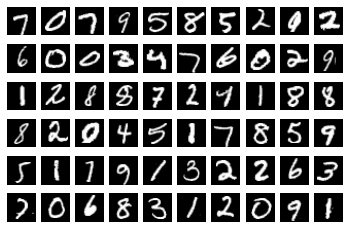

In [5]:
figure = plt.figure()
for i in range(1, 61):
    plt.subplot(6, 10, i)
    plt.axis('off')
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')

In [6]:
input_size = 28*28
hidden_sizes = [128, 64]
output_size = 10

# model
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# cross-entropy loss for the model train (using negative log-likelihood loss)
criterion = nn.NLLLoss()
images, lables = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # log probability
loss = criterion(logps, labels) # calculate the NN loss

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten images into 784 long vector
        images = images.view(images.shape[0], -1)
        
        # training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # this is where the model learns by backpropagating
        loss.backward()
        
        # and optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e ,running_loss/len(trainloader)))
print("\nTraining time (in minutes) =", (time() - time0)/60)

Epoch 0 - Training loss: 0.2827940830178479
Epoch 1 - Training loss: 0.22102463859389584
Epoch 2 - Training loss: 0.17823910782300334
Epoch 3 - Training loss: 0.14883226881633754
Epoch 4 - Training loss: 0.1292138125048454
Epoch 5 - Training loss: 0.11421613276564777
Epoch 6 - Training loss: 0.10249325799356614
Epoch 7 - Training loss: 0.09109223712541496
Epoch 8 - Training loss: 0.08284839034688149
Epoch 9 - Training loss: 0.07505487102761006
Epoch 10 - Training loss: 0.0689005006118608
Epoch 11 - Training loss: 0.06415677623751798
Epoch 12 - Training loss: 0.058392331887062374
Epoch 13 - Training loss: 0.05301730951089769
Epoch 14 - Training loss: 0.05046859500494831

Training time (in minutes) = 2.4248668710390726


predicted digit =  3


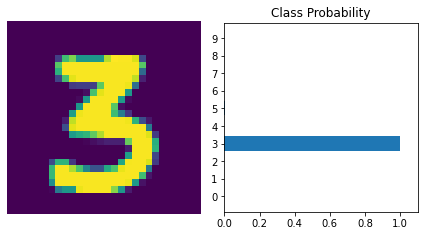

In [24]:
images , labels = next(iter(valloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("predicted digit = ", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [22]:
correct_count, all_count = 0, 0
for images, labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if (true_label == pred_label):
            correct_count += 1
        all_count += 1
print("number of images tested =", all_count)
print("\nModel accuracy =", (correct_count/all_count))

number of images tested = 10000

Model accuracy = 0.9728


In [25]:
torch.save(model, './my_mnist_model.pt')